# Assignment 9: Clustering 

#### by Anchalee P Ramirez

## 1. DBSCAN
Using DBSCAN iterate (for-loop) through different values of `min_samples` (1 to 10) and `epsilon` (.05 to .5, in steps of .01)  to find clusters in the road-data used in the Lesson and calculate the Silohouette Coeff for `min_samples` and `epsilon`. Plot **_one_** line plot with the multiple lines generated from the min_samples and epsilon values. Use a 2D array to store the SilCoeff values, one dimension represents `min_samples`, the other represents epsilon.

In [225]:
import pandas as pd
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12.0, 8.0)

In [2]:
X = pd.read_csv('C:/Users/Anchee/Desktop/MS Government Analytics JHU/Fall 2018 - Machine Learning and Neural Networks/mlnn-master/data/3D_spatial_network.txt.gz', header=None, names=['osm', 'lat','lon','alt'])
X = X.drop(['osm'], axis=1).sample(2000)

In [3]:
X.head(10)

,lat,lon,alt
389928,9.304259,57.085979,28.552060
259788,9.321739,56.743322,34.584733
229606,9.605227,56.851890,38.700042
152371,9.959502,57.562217,30.418309
165435,9.787186,56.725821,66.270968
294927,10.931579,57.282418,5.101103
410784,9.596070,57.253557,12.244087
80875,10.164837,57.462349,36.772381
114984,10.399155,57.582871,3.358095
7524,8.408909,56.754694,47.766590


In [4]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=7, random_state=1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [5]:
XX = X.copy()
XX['alt'] = (X.alt - X.alt.mean())/X.alt.std()
XX['lat'] = (X.lat - X.lat.mean())/X.lat.std()
XX['lon'] = (X.lon - X.lon.mean())/X.lon.std()

In [6]:
XX['cluster'] = km.predict(X)

In [7]:
km = KMeans(n_clusters=7, random_state=1)
XX['cluster'] = km.fit_predict(XX[['lon', 'lat', 'alt']])

In [8]:
XX.cluster.value_counts()

3    479
0    401
1    309
2    285
6    219
5    174
4    133
Name: cluster, dtype: int64

In [9]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [82]:
epsilon = np.arange(0.05,0.5,0.01)
k_range = np.arange(1, 10)
scores = []

for epsilon in epsilon:
    for k in k_range:
        dbscan = DBSCAN(eps=epsilon, min_samples = k)
        labels = dbscan.fit_predict(XX[['lon', 'lat', 'alt']])
        scores.append(metrics.silhouette_score(XX[['lon', 'lat', 'alt']], labels))

In [84]:
metrics.silhouette_score(XX[['lon', 'lat', 'alt']], labels)

0.11988656637971584

<IPython.core.display.Javascript object>


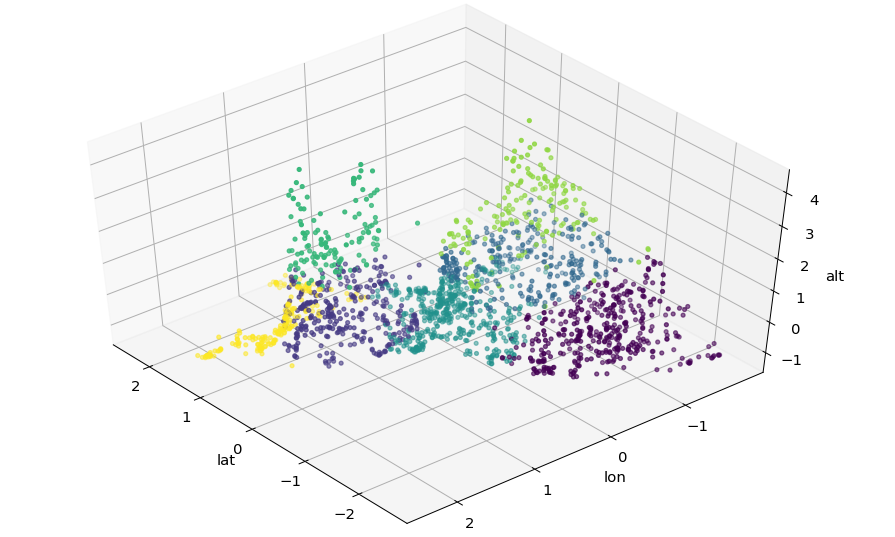

In [224]:
fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()

ax.scatter(XX['lat'], XX['lon'], XX['alt'], c=XX.cluster, s=10)

ax.set_xlabel('lat')
ax.set_ylabel('lon')
ax.set_zlabel('alt')
plt.show()

<IPython.core.display.Javascript object>


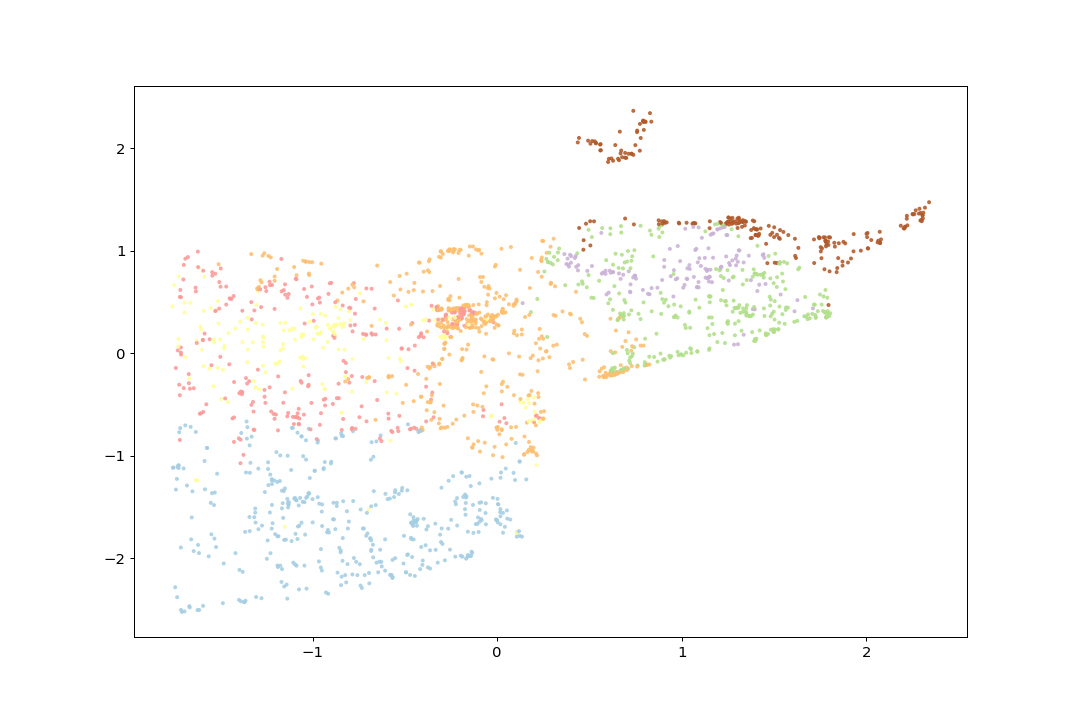

In [88]:
fig = plt.figure()
plt.scatter(XX.lon, XX.lat, alpha=0.8, s=5, c=XX.cluster, cmap='Paired')

<IPython.core.display.Javascript object>


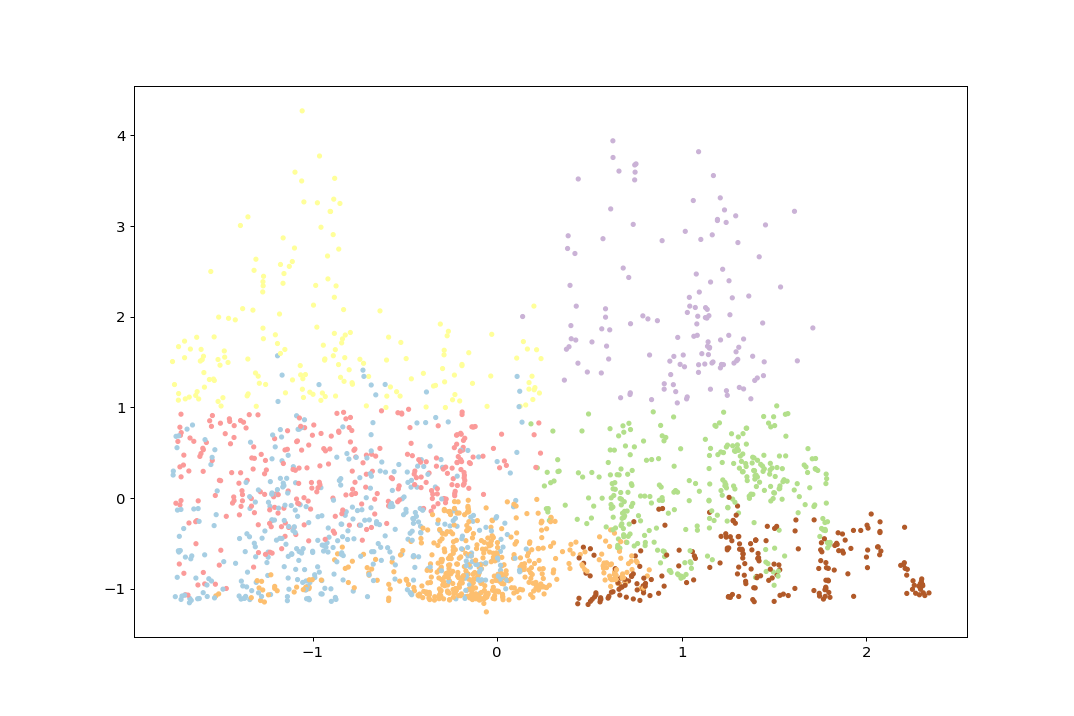

In [90]:
fig = plt.figure()
plt.scatter(XX.lon, XX.alt, s=10, c=XX.cluster, cmap='Paired')

## 2. Clustering your own data
Using your own data, find relevant clusters/groups within your data. If your data is labeled already, with a class that you are attempting to predict, be sure to not use it in fitting/training/predicting. 

You may use the labels to compare with predictions to show how well the clustering performed using one of the clustering metrics (http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). 

If you don't have labels, use the silhouette coefficient to show performance. Find the optimal fit for your data but you don't need to be as exhaustive as above.

Additionally, show the clusters in 2D and 3D plots. 

For bonus, try using PCA first to condense your data from N columns to less than N.

Two items are expected: 
- Metric Evaluation Plot
- Plots of the clustered data

## Note
You may use any for both parts 1 and 2, I only recommend using the data I used in the Lesson for part 1. I've included several new datasets in the `data/` folder, such as `beers.csv`, `snow_tweets.csv`, `data/USCensus1990.data.txt.gz`. You do not need to unzip or ungzip any data files. Pandas can open these files on its own.

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [102]:
djia = pd.read_csv('C:/Users/Anchee/Desktop/MS Government Analytics JHU/Fall 2018 - Machine Learning and Neural Networks/9 Unsupervised Learning/DowJones.csv')

In [103]:
djia.head(10)

,quarter,open,high,low,close,volume,percent_change_price,percent_return_next_dividend
0,1,15.82,16.72,15.78,16.42,239655616,3.792670,0.182704
1,1,16.71,16.71,15.64,15.97,242963398,-4.428490,0.187852
2,1,16.19,16.38,15.60,15.79,138428495,-2.470660,0.189994
3,1,15.87,16.63,15.82,16.13,151379173,1.638310,0.185989
4,1,16.18,17.39,16.18,17.14,154387761,5.933250,0.175029
5,1,17.33,17.48,16.97,17.37,114691279,0.230814,0.172712
6,1,17.39,17.68,17.28,17.28,80023895,-0.632547,0.173611
7,1,16.98,17.15,15.96,16.68,132981863,-1.766780,0.179856
8,1,16.81,16.94,16.13,16.58,109493077,-1.368230,0.180941
9,1,16.58,16.75,15.42,16.03,114332562,-3.317250,0.187149


In [104]:
djia.columns

Index(['quarter', 'open', 'high', 'low', 'close', 'volume',
       'percent_change_price', 'percent_return_next_dividend'],
      dtype='object')

In [105]:
djia.dtypes

quarter                           int64
open                            float64
high                            float64
low                             float64
close                           float64
volume                            int64
percent_change_price            float64
percent_return_next_dividend    float64
dtype: object

In [208]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5, random_state=1)
km.fit(djia)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [111]:
djia['cluster'] = km.predict(djia)

In [112]:
djia.cluster.value_counts()

3    469
1    135
2     97
4     34
0     15
Name: cluster, dtype: int64

<IPython.core.display.Javascript object>


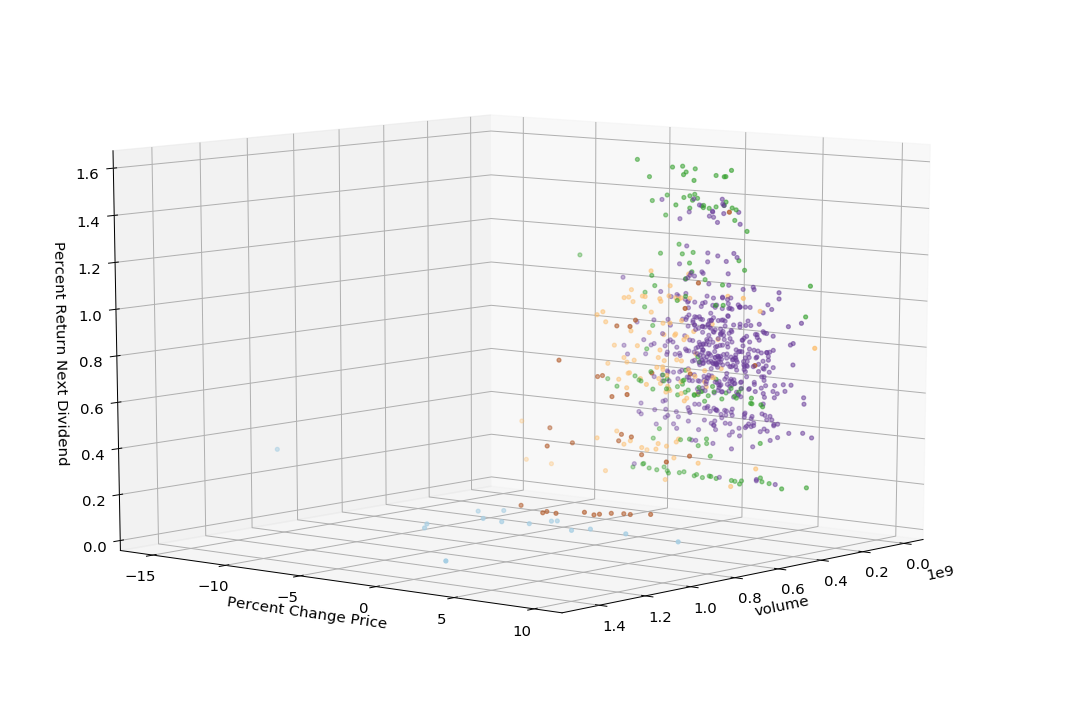

In [151]:
fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=10, azim=40)

plt.cla()

ax.scatter(djia['volume'], djia['percent_change_price'], djia['percent_return_next_dividend'], 
           c=djia.cluster, s=10, cmap="Paired")

ax.set_xlabel('volume')
ax.set_ylabel('Percent Change Price')
ax.set_zlabel('Percent Return Next Dividend')
plt.show()

<IPython.core.display.Javascript object>


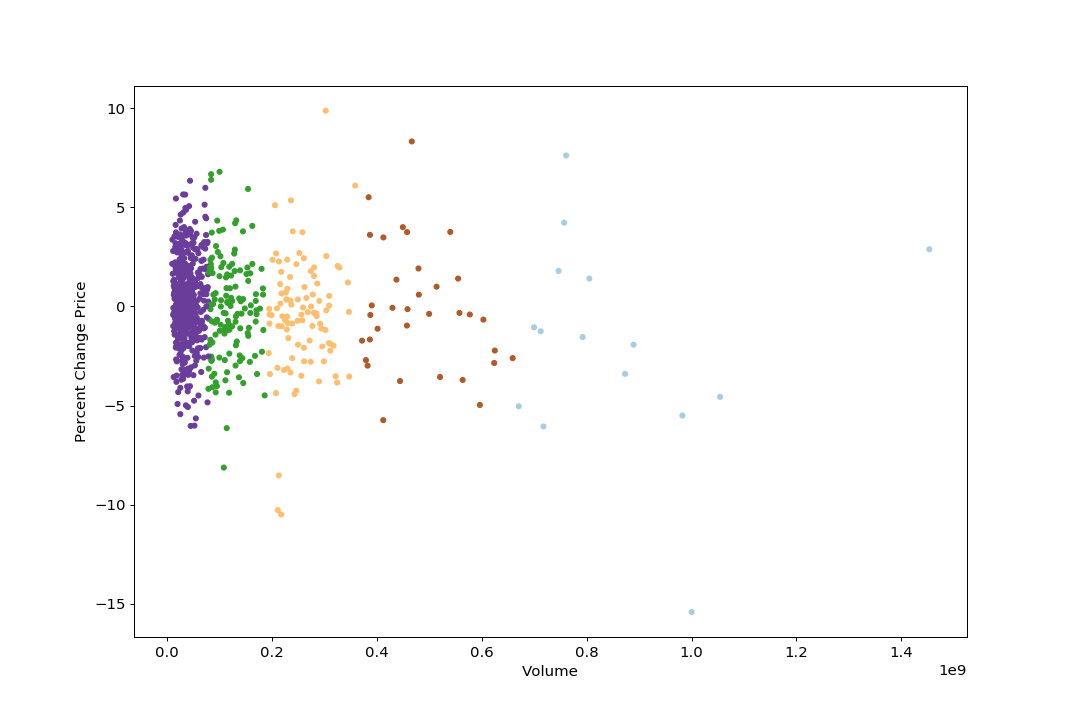

In [171]:
fig = plt.figure()
plt.scatter(djia.volume, djia.percent_change_price, c=djia.cluster, s=15, cmap='Paired')

plt.xlabel('Volume')
plt.ylabel('Percent Change Price')
plt.show()

<IPython.core.display.Javascript object>


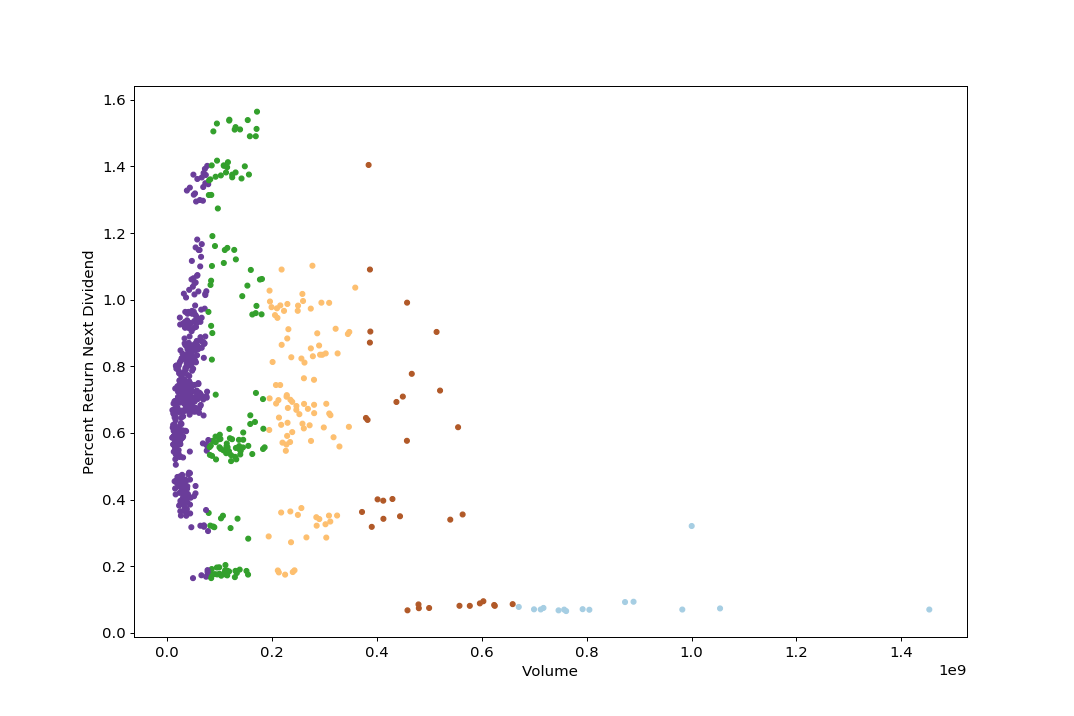

In [174]:
fig = plt.figure()
plt.scatter(djia.volume, djia.percent_return_next_dividend, c=djia.cluster, s=15, cmap='Paired')

plt.xlabel('Volume')
plt.ylabel('Percent Return Next Dividend')
plt.show()

In [161]:
djia2 = djia.copy()
djia2['volume'] = (djia.volume - djia.volume.mean())/djia.volume.std()
djia2['change_price'] = (djia.percent_change_price - djia.percent_change_price.mean())/djia.percent_change_price.std()
djia2['next_dividend'] = (djia.percent_return_next_dividend - djia.percent_return_next_dividend.mean())/djia.percent_return_next_dividend.std()

In [226]:
djia2.head()

,quarter,open,high,low,close,volume,percent_change_price,percent_return_next_dividend,cluster,change_price,next_dividend
0,1,15.82,16.72,15.78,16.42,0.770697,3.79267,0.182704,1,1.486375,-1.666618
1,1,16.71,16.71,15.64,15.97,0.791575,-4.42849,0.187852,2,-1.778829,-1.649766
2,1,16.19,16.38,15.60,15.79,0.131791,-2.47066,0.189994,2,-1.001236,-1.642754
3,1,15.87,16.63,15.82,16.13,0.213531,1.63831,0.185989,1,0.630726,-1.655864
4,1,16.18,17.39,16.18,17.14,0.232520,5.93325,0.175029,1,2.336550,-1.691742


In [163]:
km = KMeans(n_clusters=5, random_state=1)
djia2['cluster'] = km.fit_predict(djia2[['volume', 'change_price', 'next_dividend']])

<IPython.core.display.Javascript object>


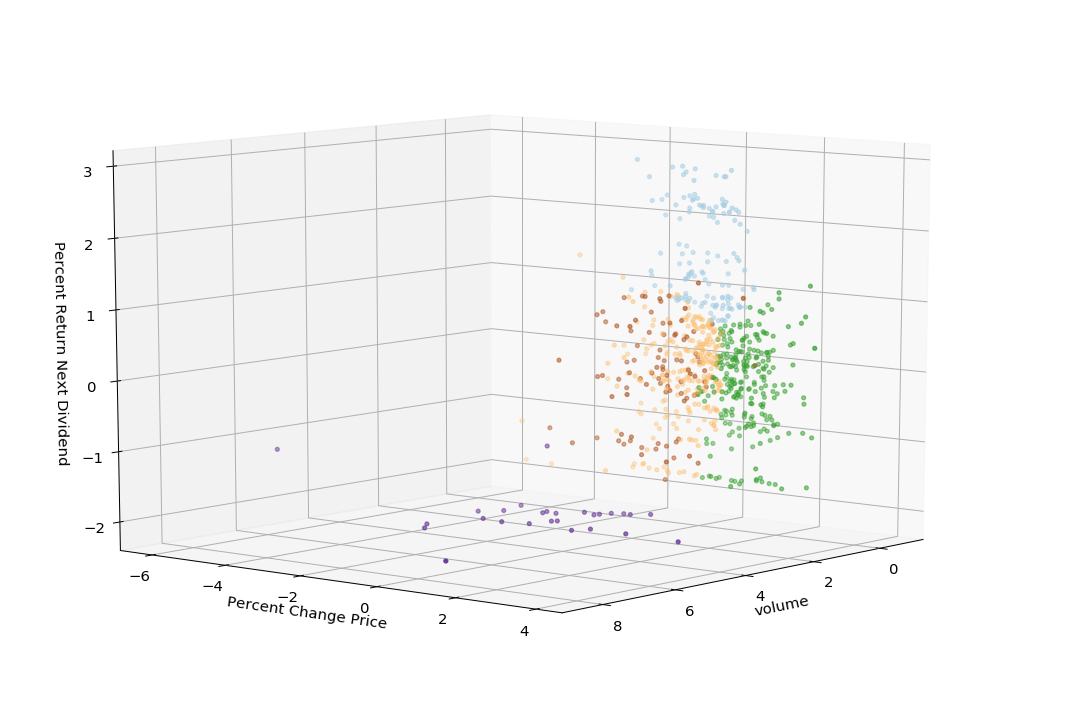

In [169]:
fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=10, azim=40)

plt.cla()

ax.scatter(djia2['volume'], djia2['change_price'], djia2['next_dividend'], 
           c=djia2.cluster, s=10, cmap="Paired")

ax.set_xlabel('volume')
ax.set_ylabel('Percent Change Price')
ax.set_zlabel('Percent Return Next Dividend')
plt.show()

<IPython.core.display.Javascript object>


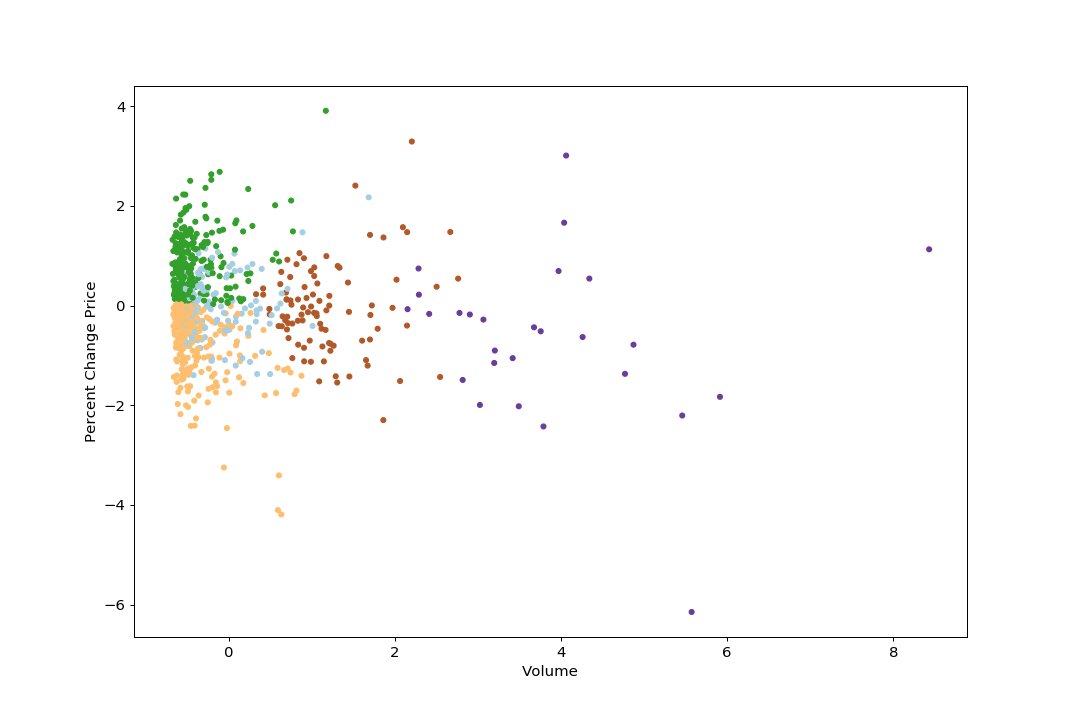

In [172]:
fig = plt.figure()
plt.scatter(djia2.volume, djia2.change_price, c=djia2.cluster, s=15, cmap='Paired')

plt.xlabel('Volume')
plt.ylabel('Percent Change Price')
plt.show()

<IPython.core.display.Javascript object>


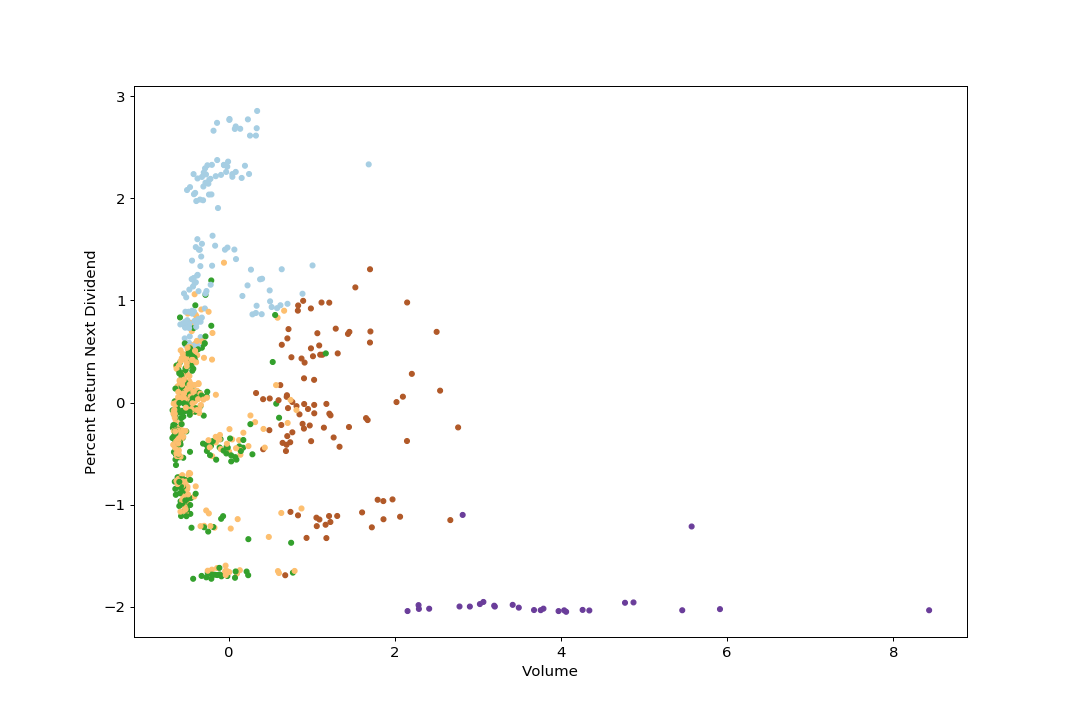

In [176]:
fig = plt.figure()
plt.scatter(djia2.volume, djia2.next_dividend, c=djia2.cluster, s=15, cmap='Paired')

plt.xlabel('Volume')
plt.ylabel('Percent Return Next Dividend')
plt.show()

In [183]:
SilScore1 = metrics.silhouette_score(djia[['volume', 'percent_change_price', 'percent_return_next_dividend']], 
                         djia.cluster)
print(SilScore1)

0.6578707631666257


In [184]:
SilScore2 = metrics.silhouette_score(djia2[['volume', 'change_price', 'next_dividend']], djia2.cluster)
print(SilScore2)

0.30299496251261093


In [185]:
SilScore3 = metrics.silhouette_score(djia2[['volume', 'change_price', 'next_dividend']], djia.cluster)
print(SilScore3)

0.20748359074455075


In [186]:
SilScore4 = metrics.silhouette_score(djia[['volume', 'percent_change_price', 'percent_return_next_dividend']], 
                         djia2.cluster)
print(SilScore4)

0.019189202559936572


We can see that the original model provides the highest Silhouette score. This means that prediction of the original model is the most accurate. 

In [200]:
km = KMeans(n_clusters=5, random_state=1)
labels = km.fit_predict(djia[['volume', 'percent_change_price', 'percent_return_next_dividend']])

<IPython.core.display.Javascript object>


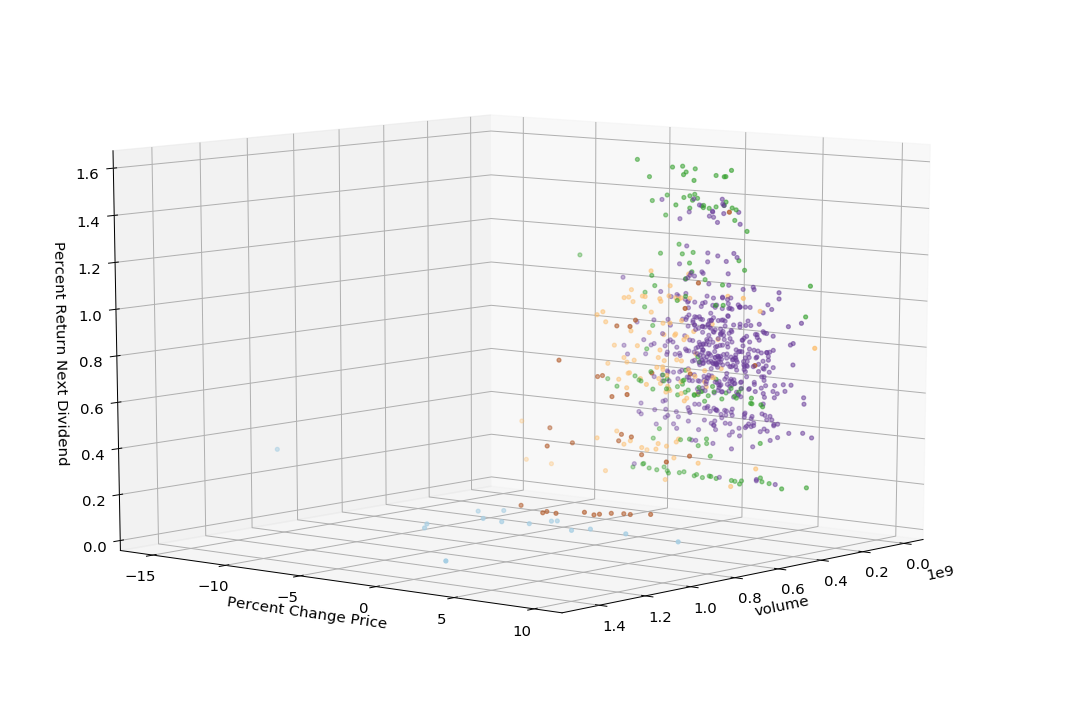

In [201]:
fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=10, azim=40)

plt.cla()

ax.scatter(djia['volume'], djia['percent_change_price'], djia['percent_return_next_dividend'], 
           c=djia.cluster, s=10, cmap="Paired")

ax.set_xlabel('volume')
ax.set_ylabel('Percent Change Price')
ax.set_zlabel('Percent Return Next Dividend')
plt.show()

<IPython.core.display.Javascript object>


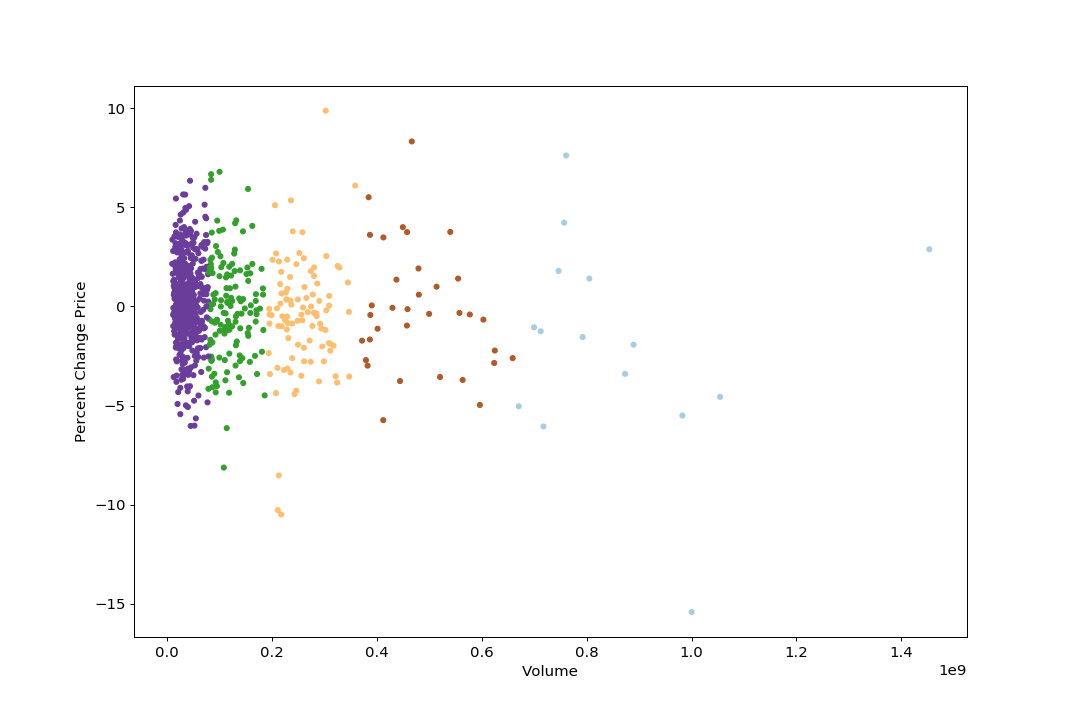

In [203]:
fig = plt.figure()
plt.scatter(djia.volume, djia.percent_change_price, c=djia.cluster, s=15, cmap='Paired')

plt.xlabel('Volume')
plt.ylabel('Percent Change Price')
plt.show()

<IPython.core.display.Javascript object>


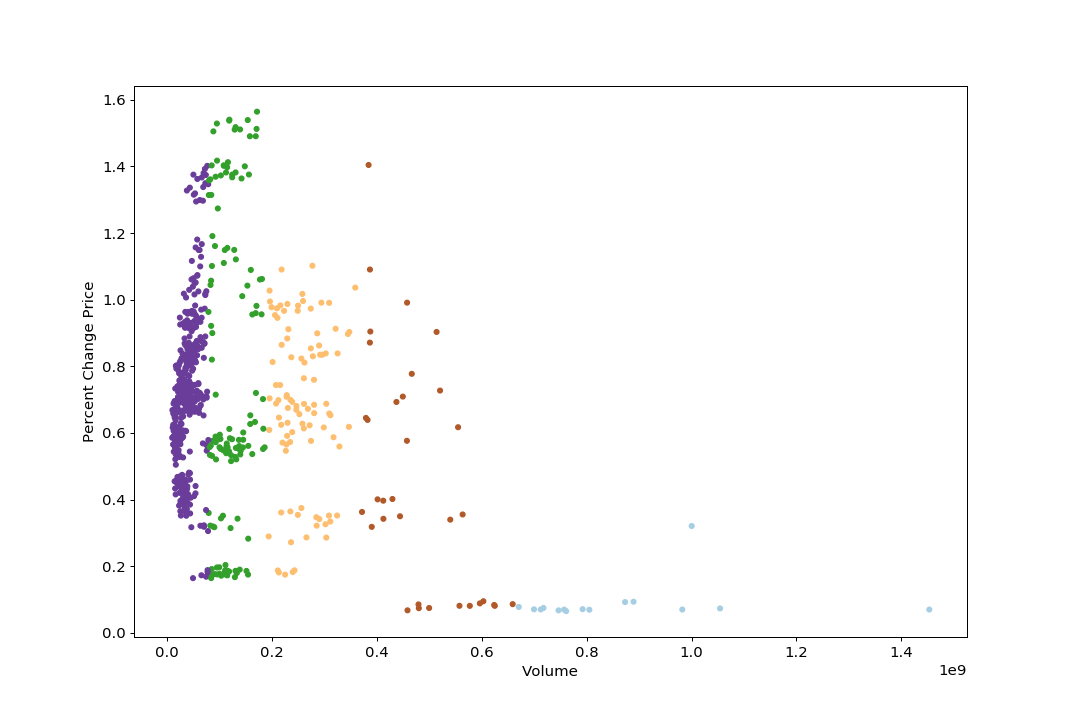

In [204]:
fig = plt.figure()
plt.scatter(djia.volume, djia.percent_return_next_dividend, c=djia.cluster, s=15, cmap='Paired')

plt.xlabel('Volume')
plt.ylabel('Percent Change Price')
plt.show()

In [205]:
SilScore5 = metrics.silhouette_score(djia[['volume', 'percent_change_price', 'percent_return_next_dividend']], labels)
print(SilScore5)

0.6576130607791614


We can also see that the original model provides slightly higher Silhouette score than the model with labels.